In [49]:
from matplotlib import pyplot as plt
import matplotlib
import numpy
from matplotlib import gridspec
import utils
import xarray
import warnings
import pandas
import scipy
import string
import datetime
import importlib
importlib.reload(utils)
import gsw
warnings.filterwarnings('ignore')
import importlib # to be able to reload user modules with importlib.reload(utils)
importlib.reload(utils)

dfo, profileso = utils.create_dataframe(pfloat='300234067208900.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_300234067208900.nc'); title='300234067208900'

#dfn, profilesn = utils.create_dataframe(pfloat='300234068638900.nc', force_reconstruction=False)
#df_col = xarray.open_dataset('../data/collocation_300234068638900.nc'); title='300234068638900.nc'

Returning previously computed DataFrame...


2020-01-06 05:00:00
133
2020-02-17 04:00:00
147
2020-03-06 04:00:00
153


"\nfor index,profile in enumerate(profilesn):\n    if index > 0:#200 and index < 500:\n        mask = profile['pre']<-250\n        profile=profile[mask\n        profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])\n        plt.plot(profile['spice'], profile['den'], color='blue', alpha=0.3)\n        plt.ylim(27.8,27.85)\n        plt.xlim(-0.24,-0.13)\n        plt.title('new')\n"

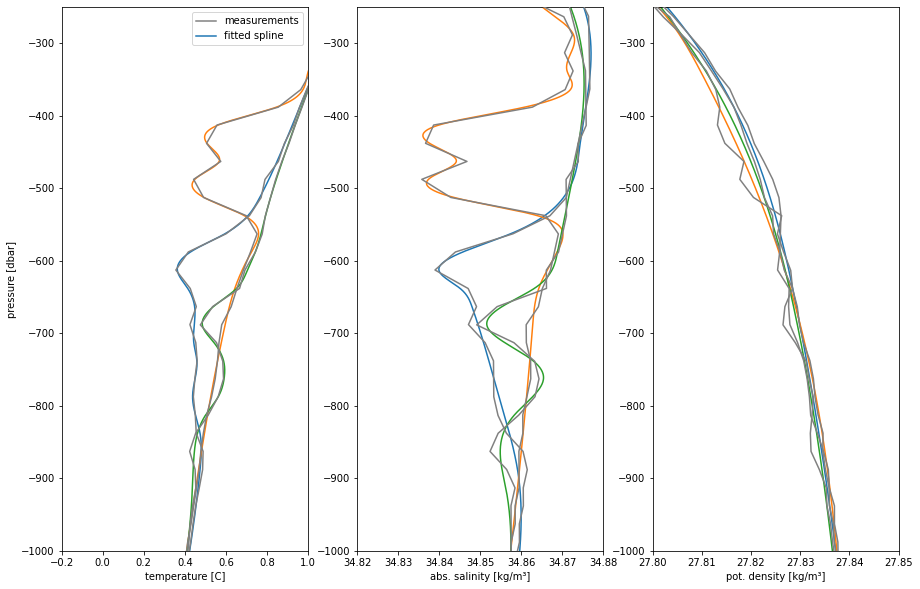

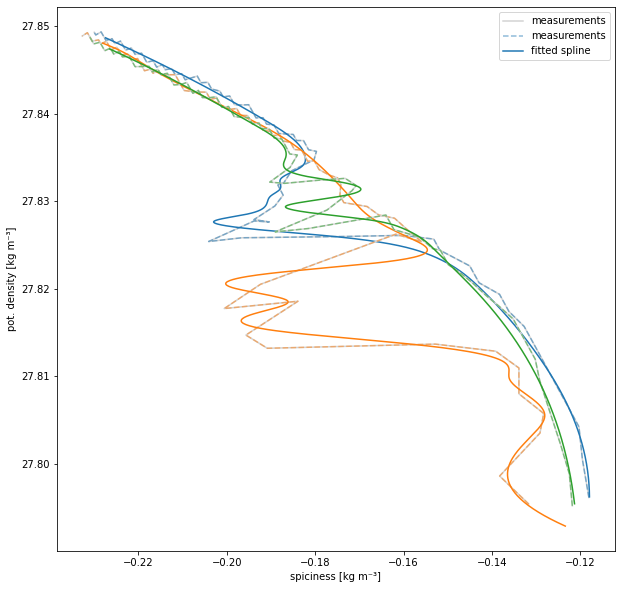

In [59]:
importlib.reload(utils)
upperdepthlimit = 200
lowerdepthlimit = 1900
profilesdict = [#{'name':'new', 'data':profilesn}]#, 
    {'name':'old', 'data':profileso}]

labelswitcher = 0 # switches to one as soon as label is created once
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for profiles in profilesdict:
    #for index,profile in enumerate(profiles['data']):
    fig1, axs1 = plt.subplots(figsize=[15,10], ncols=3)
    fig2, axs2 = plt.subplots(figsize=[10,10])
    #for num, index in enumerate([133, 147, 148, 152, 153]):
    for num, index in enumerate([133, 147, 153]):
        color = colors[num]
        # fig1, axs1 = plt.subplots(figsize=[15,10], ncols=3)
        # fig2, axs2 = plt.subplots(figsize=[10,10])

        label1 = None
        label2 = None
        if not labelswitcher:
            label1 = 'measurements'
            label2 = 'fitted spline'
            labelswitcher = 1
        
        profile = profiles['data'][index]
        print(profile['dates'].iloc[0])
        axs1[0].plot(profile['tem'], profile['pre'], color='grey',zorder=20, label=label1)
        axs1[1].plot(profile['sal'], profile['pre'], color='grey',zorder=20)
        axs1[2].plot(profile['den'], profile['pre'], color='grey',zorder=20)

        if index == 0:
            continue
        if index > 300:
            continue
        if profile['pre'].min()>-600:
            continue
        
        print(index)
        profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])
        profile=profile[profile['pre']<-upperdepthlimit]
        axs2.plot(profile['spice'], profile['den'], color='lightgrey', label=label1)
        axs2.plot(profile['spice'], profile['den'], color=color, alpha=0.5, ls='--', label=label1)
        smprofile = utils.smooth_profile(profile, #smooth_params=dict(sal=0.00005, tem=0.00015, den=0.00001),
                                       upperdepthlimit=upperdepthlimit, 
                                       lowerdepthlimit=lowerdepthlimit, skipnan=True)
        axs2.plot(smprofile['spice'], smprofile['den'], color=color, label=label2)
        #axs2.plot(profile['spice'], profile['den2'], color='blue')
        axs1[0].plot(smprofile['tem'], -smprofile['pre'], color=color, label=label2)
        axs1[1].plot(smprofile['sal'], -smprofile['pre'], color=color)
        axs1[2].plot(smprofile['den'], -smprofile['pre'], color=color)
        #axs1[2].plot(profile['den2'], -profile['pre'], color='blue')
        
        # plt.plot(profile['sal'], profile['den'], color='red')
    #plt.show()
    axs1[0].set_xlim(-0.2,1)
    axs1[0].set_ylabel('pressure [dbar]')
    axs1[1].set_xlim(34.82,34.88)
    axs1[2].set_xlim(27.8,27.85)

    axs1[0].set_ylim(-1000,-250)
    axs1[1].set_ylim(-1000,-250)
    axs1[2].set_ylim(-1000,-250)
    axs1[0].legend()
    axs2.legend()
    
    axs1[0].set_xlabel('temperature [C]')
    axs1[1].set_xlabel('abs. salinity [kg/m³]')
    axs1[2].set_xlabel('pot. density [kg/m³]')
    
    axs2.set_xlabel('spiciness [kg m⁻³]')
    axs2.set_ylabel('pot. density [kg m⁻³]')
    
    fig1.savefig('profile_smoothing.png')
    fig2.savefig('spice_smoothing.png')
    #gsw.spiciness0()
        # plt.show()
#plt.plot(profile['sal'],-profile['pre'])
#plt.plot(profile['tem'],-profile['pre'])

#plt.xlim(-0.5,-0.1)

        
"""
        if index > 0:# and index < 310:
            #mask = profile['pre']<-250
            #profile=profile[mask]
            profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])
            plt.plot(profile['spice'], profile['den'], color='red', alpha=0.3)
            plt.ylim(27.75,27.85)
            plt.xlim(-0.5,-0.1)
            plt.title('old')
"""
#plt.show()

#plt.subplots(figsize=[10,10])
"""
for index,profile in enumerate(profilesn):
    if index > 0:#200 and index < 500:
        mask = profile['pre']<-250
        profile=profile[mask
        profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])
        plt.plot(profile['spice'], profile['den'], color='blue', alpha=0.3)
        plt.ylim(27.8,27.85)
        plt.xlim(-0.24,-0.13)
        plt.title('new')
"""
#plt.gca().invert_yaxis()
#plt.show()    

In [30]:
profile['dates'].iloc[0]

Timestamp('2020-03-06 02:00:00')

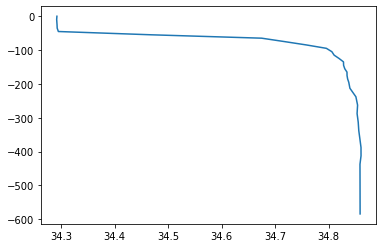

In [117]:
plt.plot(profile['sal'],profile['pre'])

In [38]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [58]:
smprofile

{'sal': array([34.86742287, 34.86753817, 34.86765245, ..., 34.84061495,
        34.84059675, 34.84057856]),
 'tem': array([ 1.22847919,  1.22704525,  1.22561167, ..., -0.014762  ,
        -0.01521378, -0.0156656 ]),
 'den': array([27.79539776, 27.79553263, 27.79566712, ..., 27.84739982,
        27.84740887, 27.84741792]),
 'den2': array([27.79233299, 27.7925251 , 27.79271635, ..., 27.8474027 ,
        27.84741216, 27.84742161]),
 'pre': array([ 200,  201,  202, ..., 1897, 1898, 1899]),
 'spice': array([-0.12130947, -0.12134128, -0.12137375, ..., -0.22641493,
        -0.22645487, -0.22649481])}